In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib
import matplotlib.pyplot as plt

In [13]:
df1 = pd.read_csv('Biden/Tweets/biden_tweets_jan.csv',lineterminator='\n')
df2 = pd.read_csv('Biden/Tweets/biden_tweets_feb.csv',lineterminator='\n')
df3 = pd.read_csv('Biden/Tweets/biden_tweets_march.csv',lineterminator='\n')
df4 = pd.read_csv('Biden/Tweets/biden_tweets_april.csv',lineterminator='\n')
df5 = pd.read_csv('Biden/Tweets/biden_tweets_may.csv',lineterminator='\n')
df6 = pd.read_csv('Biden/Tweets/biden_tweets_june.csv',lineterminator='\n')
df7 = pd.read_csv('Biden/Tweets/biden_tweets_july.csv',lineterminator='\n')
df8 = pd.read_csv('Biden/Tweets/biden_tweets_august.csv',lineterminator='\n')
df9 = pd.read_csv('Biden/Tweets/biden_tweets_september.csv',lineterminator='\n')
df10 = pd.read_csv('Biden/Tweets/biden_tweets_oct.csv',lineterminator='\n')

In [15]:
df_total = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
df_total.shape

(1019337, 8)

In [17]:
Corpus = df_total.copy()
print('I collected {} tweets.'.format(len(Corpus)))

I collected 1019337 tweets.


### Data Processing

#### Converting to lowercase

In [19]:
#converting all data to lowercase
df_total['lowercase']=df_total['tweet'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase
0,0.0,NaN,2020-01-31 23:13:14,Southern California,NaN,dianeeldredge99,@SarahLongwell25 @BillKristol I’m with you Sar...,1.22338376830131e+18,@sarahlongwell25 @billkristol i’m with you sar...
1,1.0,NaN,2020-01-31 22:16:17,Pale Blue Dot,NaN,guidoV4,By the way: there's really someone named like ...,1.2233694379585618e+18,by the way: there's really someone named like ...
2,2.0,NaN,2020-01-31 21:58:57,Inside your s.o.,NaN,Sapient6000,@mandan1459 If you are a #Biden supporter you ...,1.2233650734832394e+18,@mandan1459 if you are a #biden supporter you ...
3,3.0,NaN,2020-01-31 23:19:39,"Milky Way Galaxy, Near Chicago",NaN,Kaizle,Why Did #Biden Drop Out Of The Dem Primary In ...,1.223385382529663e+18,why did #biden drop out of the dem primary in ...
4,4.0,NaN,2020-01-31 22:41:37,{out of this world},NaN,TruthIsFact7,What bizarro land does #AdamSchiff live in? Ev...,1.223375813405479e+18,what bizarro land does #adamschiff live in? ev...


In [20]:
df_total['punctuation']=df_total['lowercase'].str.replace('[^\w\s]','')
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation
0,0.0,NaN,2020-01-31 23:13:14,Southern California,NaN,dianeeldredge99,@SarahLongwell25 @BillKristol I’m with you Sar...,1.22338376830131e+18,@sarahlongwell25 @billkristol i’m with you sar...,sarahlongwell25 billkristol im with you sarah ...
1,1.0,NaN,2020-01-31 22:16:17,Pale Blue Dot,NaN,guidoV4,By the way: there's really someone named like ...,1.2233694379585618e+18,by the way: there's really someone named like ...,by the way theres really someone named like th...
2,2.0,NaN,2020-01-31 21:58:57,Inside your s.o.,NaN,Sapient6000,@mandan1459 If you are a #Biden supporter you ...,1.2233650734832394e+18,@mandan1459 if you are a #biden supporter you ...,mandan1459 if you are a biden supporter you ar...
3,3.0,NaN,2020-01-31 23:19:39,"Milky Way Galaxy, Near Chicago",NaN,Kaizle,Why Did #Biden Drop Out Of The Dem Primary In ...,1.223385382529663e+18,why did #biden drop out of the dem primary in ...,why did biden drop out of the dem primary in 1...
4,4.0,NaN,2020-01-31 22:41:37,{out of this world},NaN,TruthIsFact7,What bizarro land does #AdamSchiff live in? Ev...,1.223375813405479e+18,what bizarro land does #adamschiff live in? ev...,what bizarro land does adamschiff live in ever...


#### Removing Stopwords

In [22]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
df_total['stopwords']=df_total['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation,stopwords
0,0.0,NaN,2020-01-31 23:13:14,Southern California,NaN,dianeeldredge99,@SarahLongwell25 @BillKristol I’m with you Sar...,1.22338376830131e+18,@sarahlongwell25 @billkristol i’m with you sar...,sarahlongwell25 billkristol im with you sarah ...,sarahlongwell25 billkristol im sarah voting re...
1,1.0,NaN,2020-01-31 22:16:17,Pale Blue Dot,NaN,guidoV4,By the way: there's really someone named like ...,1.2233694379585618e+18,by the way: there's really someone named like ...,by the way theres really someone named like th...,way theres really someone named like germany o...
2,2.0,NaN,2020-01-31 21:58:57,Inside your s.o.,NaN,Sapient6000,@mandan1459 If you are a #Biden supporter you ...,1.2233650734832394e+18,@mandan1459 if you are a #biden supporter you ...,mandan1459 if you are a biden supporter you ar...,mandan1459 biden supporter either neoliberal p...
3,3.0,NaN,2020-01-31 23:19:39,"Milky Way Galaxy, Near Chicago",NaN,Kaizle,Why Did #Biden Drop Out Of The Dem Primary In ...,1.223385382529663e+18,why did #biden drop out of the dem primary in ...,why did biden drop out of the dem primary in 1...,biden drop dem primary 1988 httpstco2sjy0hlfqg...
4,4.0,NaN,2020-01-31 22:41:37,{out of this world},NaN,TruthIsFact7,What bizarro land does #AdamSchiff live in? Ev...,1.223375813405479e+18,what bizarro land does #adamschiff live in? ev...,what bizarro land does adamschiff live in ever...,bizarro land adamschiff live everything talks ...


#### Lemmatization

In [26]:
#import Textblob
from textblob import TextBlob 
from textblob import Word

In [27]:
df_total['lemmatize']=df_total['stopwords'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))

In [28]:
df_total['polarity']=df_total['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])## just got polarity

In [30]:
#df_total['subjectivity']=df_total['lemmatize'].apply(lambda x: TextBlob(x).sentiment[1])## just got polarity

In [31]:
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation,stopwords,lemmatize,polarity
0,0.0,NaN,2020-01-31 23:13:14,Southern California,NaN,dianeeldredge99,@SarahLongwell25 @BillKristol I’m with you Sar...,1.22338376830131e+18,@sarahlongwell25 @billkristol i’m with you sar...,sarahlongwell25 billkristol im with you sarah ...,sarahlongwell25 billkristol im sarah voting re...,sarahlongwell25 billkristol im sarah voting re...,-0.107143
1,1.0,NaN,2020-01-31 22:16:17,Pale Blue Dot,NaN,guidoV4,By the way: there's really someone named like ...,1.2233694379585618e+18,by the way: there's really someone named like ...,by the way theres really someone named like th...,way theres really someone named like germany o...,way there really someone named like germany on...,0.225000
2,2.0,NaN,2020-01-31 21:58:57,Inside your s.o.,NaN,Sapient6000,@mandan1459 If you are a #Biden supporter you ...,1.2233650734832394e+18,@mandan1459 if you are a #biden supporter you ...,mandan1459 if you are a biden supporter you ar...,mandan1459 biden supporter either neoliberal p...,mandan1459 biden supporter either neoliberal p...,0.000000
3,3.0,NaN,2020-01-31 23:19:39,"Milky Way Galaxy, Near Chicago",NaN,Kaizle,Why Did #Biden Drop Out Of The Dem Primary In ...,1.223385382529663e+18,why did #biden drop out of the dem primary in ...,why did biden drop out of the dem primary in 1...,biden drop dem primary 1988 httpstco2sjy0hlfqg...,biden drop dem primary 1988 httpstco2sjy0hlfqg...,0.400000
4,4.0,NaN,2020-01-31 22:41:37,{out of this world},NaN,TruthIsFact7,What bizarro land does #AdamSchiff live in? Ev...,1.223375813405479e+18,what bizarro land does #adamschiff live in? ev...,what bizarro land does adamschiff live in ever...,bizarro land adamschiff live everything talks ...,bizarro land adamschiff live everything talk r...,0.068182


### Tweets for Biden with sentiments (-1 = negative, +1 = posiitive, 0 = neutral)

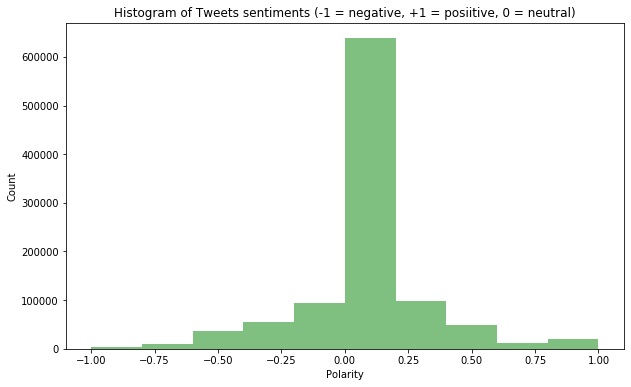

In [33]:
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_total.polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Tweets sentiments (-1 = negative, +1 = posiitive, 0 = neutral)')
plt.show();

In [34]:
data = df_total.dropna()
print('Total Number of Unique Locations Tweeting :',len(data['location'].unique()))

Total Number of Unique Locations Tweeting : 230


#### Top 20 Locations Tweeting about Biden

In [42]:
import seaborn as sns

In [45]:
top20 = data['location'].value_counts()
top20 = top20[0:20]
top20 = top20.to_frame().reset_index()
top20.rename(columns = {'index':'location','location':'counts'}, inplace = True) 

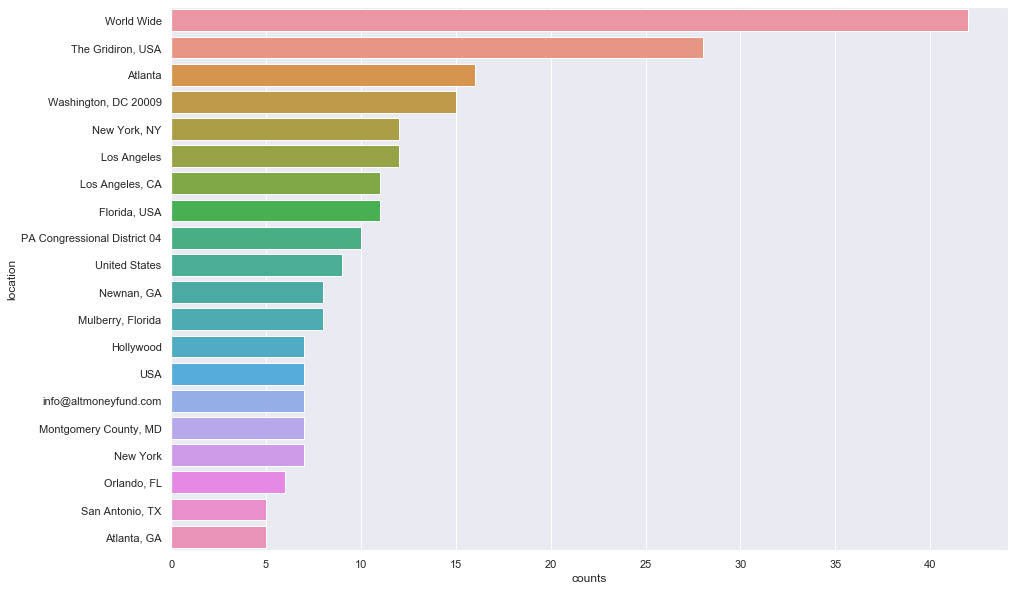

In [46]:
sns.barplot(y="location", x="counts", data=top20)
sns.set(rc={'figure.figsize':(15,10)})